In [1]:
import os
os.chdir("../")

In [2]:
import numpy as np 
from rmsKit.utils import *
from rmsKit.lattice import *
import pandas
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [3]:
IMAGE_PATH = Path("visualize/image")
WORM_RESULT_PATH = Path("../output_worm/zetta")
MODEL_NAME = "BLBQ1D"
N = 1000000
BETA_THRES = 20
if not IMAGE_PATH.exists():
    raise FileNotFoundError("{} does not exist.".format(IMAGE_PATH.resolve()))
if not WORM_RESULT_PATH.exists():
    raise FileNotFoundError("{} does not exist.".format(WORM_RESULT_PATH.resolve()))

image_model_dir = IMAGE_PATH / MODEL_NAME
worm_result_path = WORM_RESULT_PATH / MODEL_NAME


In [4]:
image_model_dir = IMAGE_PATH / MODEL_NAME
worm_result_path = WORM_RESULT_PATH / MODEL_NAME

print("looking for the result in {}".format(worm_result_path.resolve()))
print(worm_result_path.resolve())
df = result_to_dataframe(worm_result_path.resolve().as_posix())
df = df[df.sweeps == N]

df = df[df["temperature"] >= 1 / BETA_THRES]
print("temeprature simulated: {}".format(np.sort(df.temperature.unique())))
print("L simulated: {}".format(np.sort(df.n_sites.unique())))

params_df = param_dict_normalize(df['ham_path'].apply(extract_parameters_from_path))
df_final = pd.concat([df, params_df], axis=1)

looking for the result in /Users/keisukemurota/Documents/todo/worms/output_worm/zetta/BLBQ1D
/Users/keisukemurota/Documents/todo/worms/output_worm/zetta/BLBQ1D
temeprature simulated: [0.25 1.  ]
L simulated: [10 15]


In [10]:
params_df.J0.unique()

array([ 3. ,  2.8,  2.6,  2.4,  2.2,  2. ,  1.8,  1.6,  1.4,  1.2,  1. ,
        0.8,  0.6,  0.4, -3. ,  0.2, -2.8,  0. , -2.6, -0.2, -2.4, -2.2,
       -0.4, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6])

In [23]:
J0_list

array([ 3. ,  2.8,  2.6,  2.4,  2.2,  2. ,  1.8,  1.6,  1.4,  1.2,  1. ,
        0.8,  0.6,  0.4, -3. ,  0.2, -2.8, -2.6,  0. , -2.4, -0.2, -2.2,
       -0.4, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8, -0.6])

/Users/keisukemurota/Documents/todo/worms/python/rmsKit/utils/functions.py:225: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['loss'] = df['u_path'].str.extract(
/var/folders/z7/m5qzz0hj12z06hxsn5km2c400000gn/T/ipykernel_16685/586733078.py:30: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  c = ax[0].pcolormesh(X, Y, Z, cmap='RdBu', vmin=0, vmax=2)
/var/folders/z7/m5qzz0hj12z06hxsn5km2c400000gn/T/ipykernel_16685/586733078.py:35: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasi

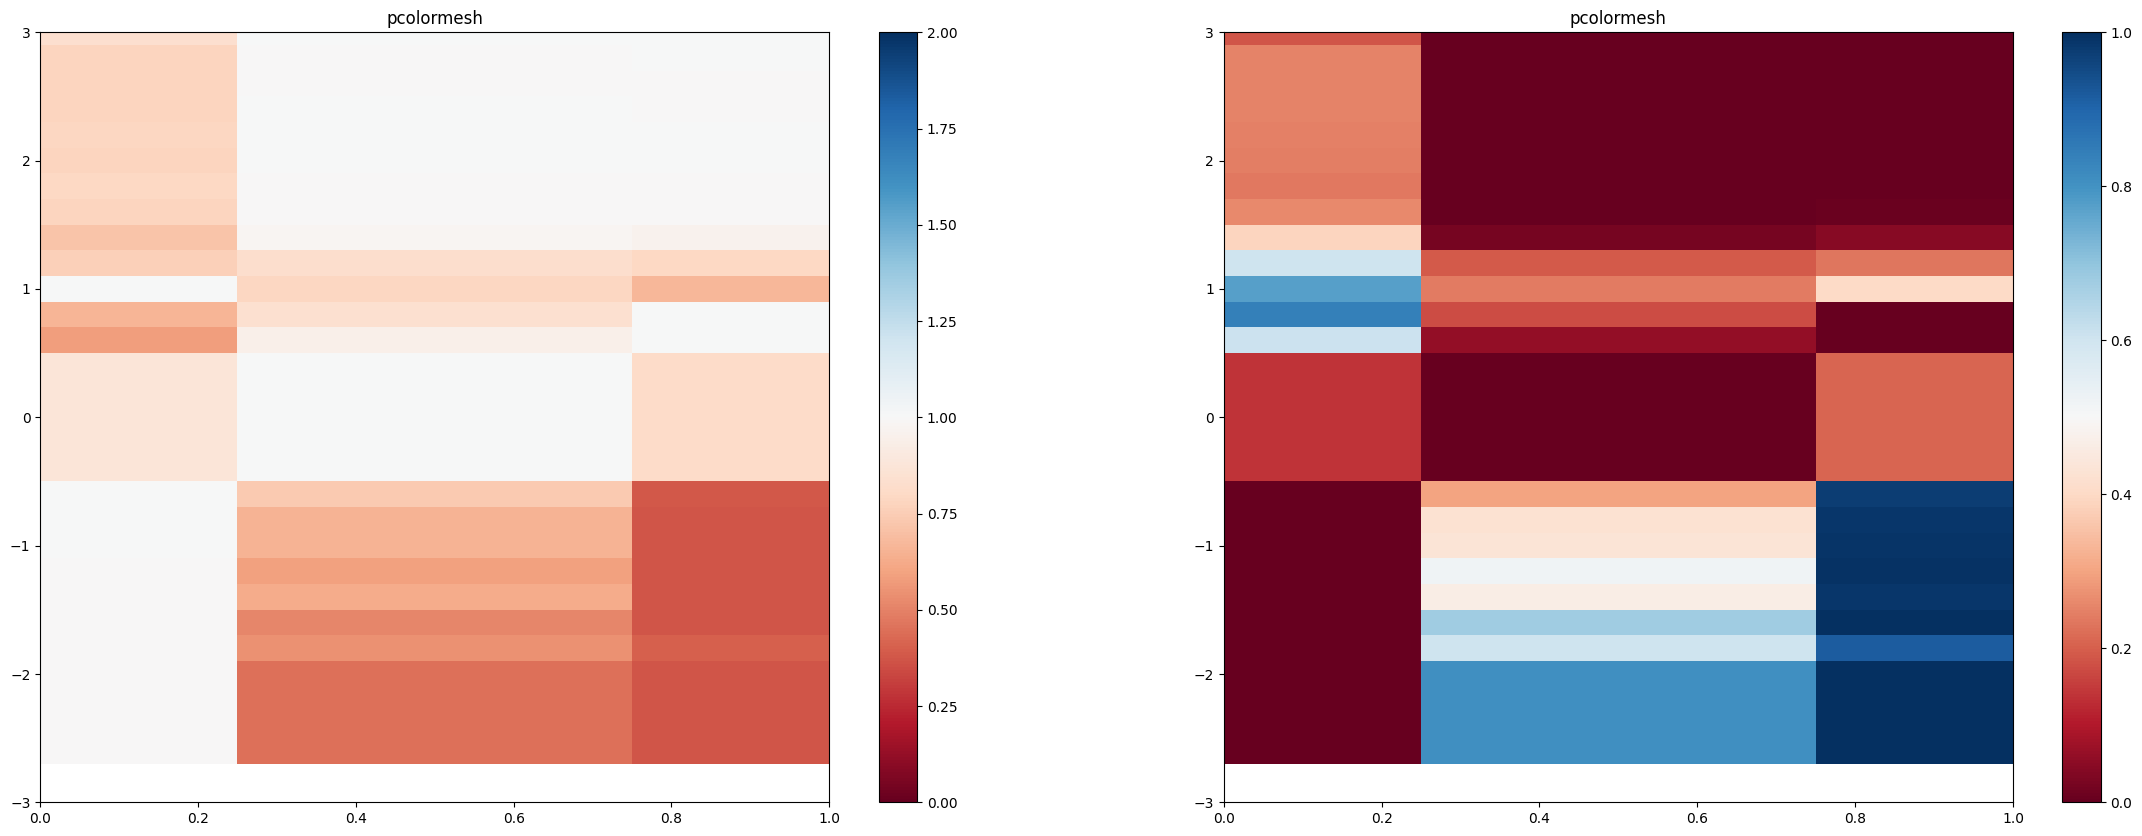

In [48]:
T = 0.25
L = 10

df = df_final[(df_final.temperature == T)&(df_final.n_sites == L)]
df = get_loss(df)


J0_list = df.J0.unique()
J1_list = df.J1.unique()
hx_list = df.hx.unique()
hz_list = df.hz.unique()

z = []
z2 = []
X, Y = np.meshgrid(hx_list,J0_list)
for x, y in zip(X.reshape(-1), Y.reshape(-1)):
    df_plot = df[(df.hx==x) & (df.J0==y)]
    df_u = df_plot[~df_plot.loss.isna()]
    df_h = df_plot[df_plot.loss.isna()]
    au = df_u["as"].mean()
    ah = df_h["as"].mean()
    
    z.append(np.exp(ah - au))
    z2.append(au)
Z = np.array(z).reshape(X.shape)
Z2 = np.array(z2).reshape(X.shape)

fig, ax = plt.subplots(1,2,figsize=(28,10))

c = ax[0].pcolormesh(X, Y, Z, cmap='RdBu', vmin=0, vmax=2)
ax[0].set_title('pcolormesh')
ax[0].axis([X.min(), X.max(), Y.min(), Y.max()])
fig.colorbar(c, ax=ax[0])

c = ax[1].pcolormesh(X, Y, Z2, cmap='RdBu', vmin=0, vmax=1)
ax[1].set_title('pcolormesh')
ax[1].axis([X.min(), X.max(), Y.min(), Y.max()])
fig.colorbar(c, ax=ax[1])


plt.show()

In [49]:
df[df.J0 == 3]

,model_name,alpha,temperature,n_sites,u_path,ham_path,sweeps,as,as_error,e,...,m_error,chi,chi_error,modelname,J0,J1,hz,hx,lt,loss
731,BLBQ1D,0.0,0.25,10,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,-0.001718,0.001355,-2.63144,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,1.0,1.0,0.34122
732,BLBQ1D,0.0,0.25,10,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,0.000668,0.001677,7.67009,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,0.5,1.0,0.16480
742,BLBQ1D,0.0,0.25,10,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,0.126562,0.003089,-1.99021,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,0.0,1.0,0.00000
755,BLBQ1D,0.0,0.25,10,,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,-0.000768,0.001447,-5.84106,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,1.0,1.0,NaN
757,BLBQ1D,0.0,0.25,10,,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,0.001694,0.001629,-2.56184,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,0.5,1.0,NaN
761,BLBQ1D,0.0,0.25,10,,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,0.001306,0.001321,-2.20829,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,0.0,1.0,NaN
942,BLBQ1D,0.0,0.25,10,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,-0.000116,0.001462,inf,...,NaN,NaN,NaN,BLBQ1D,3.0,1.0,0.0,1.0,1.0,0.45371
944,BLBQ1D,0.0,0.25,10,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,0.000968,0.001658,-3.03883,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,0.5,1.0,0.16545
951,BLBQ1D,0.0,0.25,10,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,0.248416,0.004245,-2.00628,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,0.0,1.0,0.00255
964,BLBQ1D,0.0,0.25,10,,/home/keisuke/worms/job/link/BLBQ1D_J0_3.000_J...,1000000,-0.000768,0.001447,-5.84106,...,0.0,0.0,0.0,BLBQ1D,3.0,1.0,0.0,1.0,1.0,NaN
